<a href="https://colab.research.google.com/github/AntoniaAcevedo/ADA-Informe/blob/main/Informe4_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

---
**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/LbdnIIA.jpg)

>Continuando con el paradigma de **divide y venceras** el algoritmo QuickSort comienza con un problema el cual divide en tres subproblemas mas pequeños los cuales son:
>- el pivote, este es el numero o valor que se encuentra en el final del problema original con el que despues se comparan el resto de numeros o valores.

>- el lado derecho o ' i ', donde se posicionan los numeros o valores mayores que el pivote.

>- el lado izquierdo o ' j ', donde se posicionan los numeros o valores menores o iguales que el pivote.




#2. QuickSort

---
En los siguientes códigos se mostraran tres casos del algoritmo **QuickSort**,donde varia la seleccion del pivote en el metodo **Partition**.

##2.1 Codigos

---

###2.1.1 Codigo Caso donde el pivote es el ultimo valor del arreglo 

---

In [49]:
def partition(array, low, high, t, verbose = False):
  pivot = array[high]
  i = low - 1
  for j in range(low, high):
    t += 1

    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
    if verbose:
      print("\n Iteracion",t)
      print(str(array)[1:-1])
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1,t

def quicksort(array, low, high, t, verbose = False):
  if low < high:
    pi, t = partition(array, low, high, t, verbose)
    t = quicksort(array, low, pi - 1, t, verbose)
    t = quicksort(array, pi + 1, high, t, verbose)
  return t
  
A = [5,8,7,1,3]
print("Entrada: ",A)
h= len(A) - 1
t= quicksort(A, 0, h, 0)
print("Salida: ",A)
print("# comparaciones: ",t)


Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  7


###2.1.2 Codigo Caso donde el pivote es el primer valor del arreglo 

---

In [50]:
from termcolor import colored

def Particion(array, low, high, t, verbose = False):
    pivot = array[low]
    while True:
        t+=1
        while array[low] < pivot:     
            low += 1
        while array[high] > pivot:
            high -= 1
        if verbose:
            print("\n Iteracion",t)
            print(str(array)[1:-1])
        if low >= high:
            return high, t
        else:
            array[low], array[high] = array[high], array[low]
            low += 1
            high -= 1

def quick_sort(array, low, high, t, verbose = False):
    if low < high:
        pi,t = Particion(array, low, high, t, verbose)
        t= quick_sort(array, low, pi, t, verbose)
        t= quick_sort(array, pi + 1, high, t, verbose)
    return t

"""
Modo de uso:
"""
A = [5,8,7,1,3]
print("Entrada: ",A)
h= len(A) - 1
t= quick_sort(A, 0, h, 0)
print("Salida: ",A)
print("# comparaciones: ",t)

Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  9


###2.1.3 Codigo Caso donde el pivote es la mediana del arreglo
--- 

In [51]:
import numpy as np
def Partition_(array, low, high, t, verbose = False):
  n= median_value = np.percentile(a, 50) 
  array[high] = n
  pivot = array[high]
  i = low - 1
  for j in range(low, high):
    t += 1

    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
    if verbose:
      print("\n Iteracion",t)
      print(str(array)[1:-1])
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1,t

def Quick_sort(array, low, high, t, verbose = False):
  if low < high:
    pi, t = Partition_(array, low, high, t, verbose)
    t = Quick_sort(array, low, pi - 1, t, verbose)
    t = Quick_sort(array, pi + 1, high, t, verbose)
  return t

A = [5,8,7,1,3]
print("Entrada: ",A)
h= len(A) - 1
t= Quick_sort(A, 0, h, 0)
print("Salida: ",A)
print("# comparaciones: ",t)

Entrada:  [5, 8, 7, 1, 3]
Salida:  [5, 33.5, 33.5, 33.5, 33.5]
# comparaciones:  10


##2.2 Descripcion del algoritmo

---
El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. Con esto en mente se aplica el paradigma **divide y venceras** en el cual se recibe en un inicio un arreglo `A[p..r]`, se realizan los siguientes procesos:

- Se **divide** el arreglo en 2 sub-arreglos: `A[p..q-1]` y `A[q+1..r]` de tal forma que todos los elementos de `A[p..q-1]` son menores o iguales a $q$. A su vez los elmentos de `A[q+1..r]` son mayores o iguales a $q$.
- Se llama a **quicksort** para ordenar los subarreglos `A[p..q-1]` y `A[q+1..r]`
- Nada más que hacer, el arreglo **ya se encuentra ordenado**: `A[p..q-1]`; `A[q]`;` A[q+1..r].`


Para poder realizar este ordenamiento se implementa el metodo partition el cual con la ayuda de un pivote, el cual en su mayoria es el ultimo valor del arreglo inicial, dicho pivote se va comparando con los valores dentro del arreglo posicionandolos en donde pertenecen, es decir que si el numero que deseamos comparar `es menor o igual que el pivote` se posiciona en el sub-arreglo `A[p..q-1]`, si `es mayor que el pivote` se posiciona en el subarreglo `A[q+1..r]`, este funcionamiento se hace de forma recursiva dentro del **QuickSort** llamando a la funcion **Partition** las veces que sea necesario para tener todo el arreglo ordenado.

Y cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

##2.3 Ejemplo 

---

Consideremos, por ejemplo, el arreglo:

$a=[4,1,5,3]$

- En la primera pasada se compara el 4 con el 3 el cual es el pivote (3):

--> al tener que 4 es mayor que 3 se queda en esa misma posicion pero queda con el parametro de ser j es decir que es mayor y se debe hubicar a la derecho.

$a=[4,1,5,3]$

- Luego, en la segunda pasada el 1 se compara con el 3:

--> al tener que 1 es menor que 3 su posicion cambia ya que queda con el parametro de ser i es decir los valores menores o iguales al pivote, al ya tener los primeros valores de i y j se puede visualizar de mejor manera la separacion de estos sub-problemas. Dejando el 1 en el lado izquierdo.

$a=[1,4,5,3]$

- Luego, en la tercera pasada el 5 se compara con el 3:

--> al tener que el 5 es mayor que 3 su posicion se mantiene ya que se encuentra posicionado a la derecha en el sub-problema j donde se hubican los valores mayores al pivote.

$a=[1,4,5,3]$

- Y en la cuarta pasada el pivote se rehubica entre los dos sub-problemas i y j:

$a=[1,3,5,4]$

Y ya tenemos el arreglo ordenado.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

---
Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [57]:
import random

#Caso 1
a = random.sample(range(1, 100), 8)
h= len(a) - 1
print("ENTRADA: ",a)
t= quicksort(a, 0, h, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [3, 26, 98, 41, 25, 69, 16, 66]

 Iteracion 1
3, 26, 98, 41, 25, 69, 16, 66

 Iteracion 2
3, 26, 98, 41, 25, 69, 16, 66

 Iteracion 3
3, 26, 98, 41, 25, 69, 16, 66

 Iteracion 4
3, 26, 41, 98, 25, 69, 16, 66

 Iteracion 5
3, 26, 41, 25, 98, 69, 16, 66

 Iteracion 6
3, 26, 41, 25, 98, 69, 16, 66

 Iteracion 7
3, 26, 41, 25, 16, 69, 98, 66

 Iteracion 8
3, 26, 41, 25, 16, 66, 98, 69

 Iteracion 9
3, 26, 41, 25, 16, 66, 98, 69

 Iteracion 10
3, 26, 41, 25, 16, 66, 98, 69

 Iteracion 11
3, 26, 41, 25, 16, 66, 98, 69

 Iteracion 12
3, 16, 41, 25, 26, 66, 98, 69

 Iteracion 13
3, 16, 25, 41, 26, 66, 98, 69

 Iteracion 14
3, 16, 25, 26, 41, 66, 98, 69
# comparaciones:  14


In [55]:
import random

#Caso 2
a = random.sample(range(1, 100), 8)
h= len(a) - 1
print("ENTRADA: ",a)
t= quick_sort(a, 0, h, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [67, 48, 52, 81, 91, 8, 29, 97]

 Iteracion 1
67, 48, 52, 81, 91, 8, 29, 97

 Iteracion 2
29, 48, 52, 81, 91, 8, 67, 97

 Iteracion 3
29, 48, 52, 8, 91, 81, 67, 97

 Iteracion 4
29, 48, 52, 8, 91, 81, 67, 97

 Iteracion 5
8, 48, 52, 29, 91, 81, 67, 97

 Iteracion 6
8, 48, 52, 29, 91, 81, 67, 97

 Iteracion 7
8, 29, 52, 48, 91, 81, 67, 97

 Iteracion 8
8, 29, 52, 48, 91, 81, 67, 97

 Iteracion 9
8, 29, 48, 52, 91, 81, 67, 97

 Iteracion 10
8, 29, 48, 52, 91, 81, 67, 97

 Iteracion 11
8, 29, 48, 52, 67, 81, 91, 97

 Iteracion 12
8, 29, 48, 52, 67, 81, 91, 97

 Iteracion 13
8, 29, 48, 52, 67, 81, 91, 97
# comparaciones:  13


In [54]:
import random

#Caso 3
a = random.sample(range(1, 100), 8)
h= len(a) - 1
print("ENTRADA: ",a)
t= Quick_sort(a, 0, h, 0, True)
print("# comparaciones: ", t)

ENTRADA:  [19, 68, 95, 7, 30, 23, 16, 6]

 Iteracion 1
19, 68, 95, 7, 30, 23, 16, 21.0

 Iteracion 2
19, 68, 95, 7, 30, 23, 16, 21.0

 Iteracion 3
19, 68, 95, 7, 30, 23, 16, 21.0

 Iteracion 4
19, 7, 95, 68, 30, 23, 16, 21.0

 Iteracion 5
19, 7, 95, 68, 30, 23, 16, 21.0

 Iteracion 6
19, 7, 95, 68, 30, 23, 16, 21.0

 Iteracion 7
19, 7, 16, 68, 30, 23, 95, 21.0

 Iteracion 8
19, 7, 22.0, 21.0, 30, 23, 95, 68

 Iteracion 9
19, 7, 22.0, 21.0, 30, 23, 95, 68

 Iteracion 10
19, 22.5, 22.0, 21.0, 30, 23, 95, 68

 Iteracion 11
19, 22.5, 22.0, 21.0, 30, 23, 95, 22.75

 Iteracion 12
19, 22.5, 22.0, 21.0, 30, 23, 95, 22.75

 Iteracion 13
19, 22.5, 22.0, 21.0, 30, 23, 95, 22.75

 Iteracion 14
19, 22.5, 22.0, 21.0, 22.75, 23, 95, 22.625

 Iteracion 15
19, 22.5, 22.0, 21.0, 22.75, 23, 95, 22.625

 Iteracion 16
19, 22.5, 22.0, 21.0, 22.75, 22.625, 95, 22.5625
# comparaciones:  16


#3. Tiempo de ejecucion

---

### **Teorema (Tiempo de ejecución).**

*El algoritmo **QuickSort** tiene un **tiempo de ejecución de** $\Theta(n^2)$ en el peor caso.*

*Aunque  tiene un **tiempo de ejecución de** $\Theta(n \log n)$ en el caso promedio.*
## Prueba del teorema

Observando el código, podemos apreciar que el **peor caso** ocurre cuando el **mayor elemento** se encuentra al final del arreglo y este es el pivote o cuando el **menor elemento** se encuentra en el inicio y este es el pivote. Ya que al hacer las comparaciones tendra que ir uno por uno comparando dejando a todos en las mismas posiciones en las que ya se encontraban originalmente. 

###Ejemplo

In [63]:
#Caso donde el pivote es el mayor elemento

a =[4,1,3,5]
print("Entrada no ordenada:",a)
h= len(a) - 1
t= quicksort(a, 0, h, 0, True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",t)

Entrada no ordenada: [4, 1, 3, 5]

 Iteracion 1
4, 1, 3, 5

 Iteracion 2
4, 1, 3, 5

 Iteracion 3
4, 1, 3, 5

 Iteracion 4
4, 1, 3, 5

 Iteracion 5
1, 4, 3, 5
Salida ordenada: [1, 3, 4, 5]
Total de comparaciones realizadas: 5


In [65]:
#Caso donde el pivote es el menor elemento

a =[1,4,3,5]
print("Entrada no ordenada:",a)
h= len(a) - 1
t= quick_sort(a, 0, h, 0, True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",t)

Entrada no ordenada: [1, 4, 3, 5]

 Iteracion 1
1, 4, 3, 5

 Iteracion 2
1, 4, 3, 5

 Iteracion 3
1, 3, 4, 5

 Iteracion 4
1, 3, 4, 5
Salida ordenada: [1, 3, 4, 5]
Total de comparaciones realizadas: 4


In [71]:
#Mejor caso (EXTRA)
a = random.sample(range(1, 100), 1)
h= len(a) - 1
t= quicksort(a, 0, h, 0)
print("Arreglo de uno:",a)
print("Iteraciones:",t)  

Arreglo de uno: [24]
Iteraciones: 0


#4. Correctitud

---

### **Teorema (Correctitud).**

*El algoritmo **QuickSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

**Inicialización**

Al inicio  se compara el pivote "x" con el primer valor, si este es menor que el privote o igual a este se ubica en el sub-problema izquierdo "i", si este este valor es mayor que el pivote se ubivara en el lado derecho donde esta el otro sub-problema "j" dejando definidas las divisiones.

**Mantención**

 En cada iteracion se compara  el pivote con el valor `[j + 1]`, si este es mayor se ubica en la derecha por lo que se sigue manteniendo la propiedad, si se compara y es menor o igual se ubicara en el lado izquierdo por lo que en este caso tambien se mantendria la propiedad, luego de esto se pasa al siguiente valor sin comparar `[j + 1]` repitiendo lo anterior. 
 
![image](https://i.imgur.com/jKFzCpe.jpg)

**Correctitud**

Finalmente, llamando de forma recursivamente este paso a paso se logra obtener un arreglo final donde el pivote se ubica entre los dos sub-arreglos donde los valores menores estana la izquierda de "x" y los meyores a la derecha de "x". 

#5. Experimentos

---

##5.1 Número de comparaciones

---
A continuacion se puede visualizar un grafico donde se compara un caso experimental cualquiera del algoritmo **QuickSort**, con su caso promedio y peor caso.

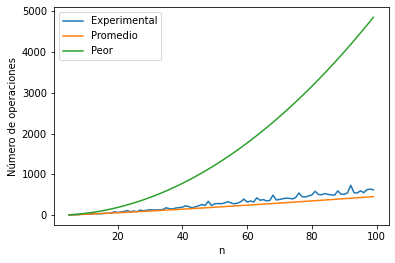

In [ ]:
import matplotlib.pyplot as plt
from math import log

x=[n for n in range(5,100)]

y_best = []
y_promedio= [n*log(n) for n in range(5,100)]
y_peor=[n*(n-1)/2 for n in range(5,100)]

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= quicksort(a, 0, h, 0) 
  y_best.append(t)

plt.plot(x,y_best)
plt.plot(x,y_promedio)
plt.plot(x,y_peor)
plt.legend(["Experimental", "Promedio","Peor"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()


### Análisis de resultados

Se logra visualizar la gran diferencia que existe con el peor caso y el promedio, donde se puede ver que el caso experimental roza y se encuentra en mejor sintonia con los casos promedios afirmando que es algo reiterativo, haciendo mas fideligno el promedio.

## 5.2. Tiempo de ejecución (experimental)

---
En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **QuickSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

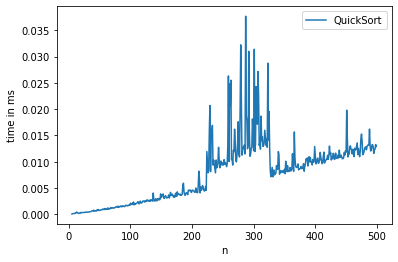

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  h= len(a) - 1
  t = repeat(setup="from __main__ import quicksort", stmt=f"quicksort{a, 0, h, 0}", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Se logra visualizar picks dentro del grafico a la hora de ver el tiempo de ejecucion logrando ver que entre los intervalos del 200 y 300 hay un aumento considerable de dicho tiempo.

##5.3 Rendimiendo con modificacion de pivote

---

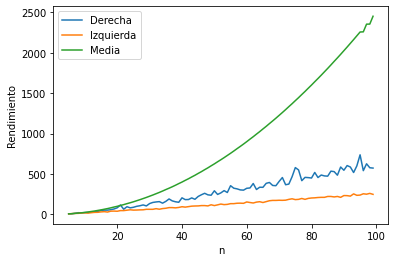

In [72]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)]

y_iz = []
y_der= []
y_media=[]

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= quicksort(a, 0, h, 0) 
  y_der.append(t)

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= quick_sort(a, 0, h, 0) 
  y_iz.append(t)

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= Quick_sort(a, 0, h, 0) 
  y_media.append(t)

plt.plot(x,y_der)
plt.plot(x,y_iz)
plt.plot(x,y_media)
plt.legend(["Derecha", "Izquierda","Media"])

plt.xlabel('n')
plt.ylabel('Rendimiento')
plt.show()

### Análisis de resultados

Se logra visualizar una cercania y una varianza menor entre las comparaciones de los algoritmos con el pivote como primer elemento (izquierda) y con el algoritmo donde el pivote es el ultimo elemento (derecha) dejandonos entender que a pesar que sean similares la mejor opcion es ubicar el pivote como ultimo elemento